In [0]:
dbutils.fs.mount(
    source ="wasbs://music-store-analysis-project@functionalstorage.blob.core.windows.net",
    mount_point = "/mnt/raw3" ,
    extra_configs = {"fs.azure.account.key.functionalstorage.blob.core.windows.net":"rE2w8hRoJD1rx2I529gtQaudYsyLscOWFmcEnNFyXMrINcl+NOuQ31v1zpHVqSPkQjI3ZO22gW49+ASt9qg6Jg=="})

Out[3]: True

In [0]:
dbutils.fs.ls("/mnt/raw3")

Out[4]: [FileInfo(path='dbfs:/mnt/raw3/album.csv', name='album.csv', size=11203, modificationTime=1707249502000),
 FileInfo(path='dbfs:/mnt/raw3/artist.csv', name='artist.csv', size=7293, modificationTime=1707249514000),
 FileInfo(path='dbfs:/mnt/raw3/customer.csv', name='customer.csv', size=6796, modificationTime=1707249530000),
 FileInfo(path='dbfs:/mnt/raw3/employee.csv', name='employee.csv', size=1707, modificationTime=1707249542000),
 FileInfo(path='dbfs:/mnt/raw3/genre.csv', name='genre.csv', size=355, modificationTime=1707249555000),
 FileInfo(path='dbfs:/mnt/raw3/invoice.csv', name='invoice.csv', size=50617, modificationTime=1707249567000),
 FileInfo(path='dbfs:/mnt/raw3/invoice_line.csv', name='invoice_line.csv', size=101153, modificationTime=1707249581000),
 FileInfo(path='dbfs:/mnt/raw3/media_type.csv', name='media_type.csv', size=144, modificationTime=1707249594000),
 FileInfo(path='dbfs:/mnt/raw3/playlist.csv', name='playlist.csv', size=318, modificationTime=1707249607000)

In [0]:
album= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/album.csv')
artist= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/artist.csv')
customer= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/customer.csv')
employee= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/employee.csv')
genre= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/genre.csv')
invoice= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/invoice.csv')
invoice_line= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/invoice_line.csv')
media_type= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/media_type.csv')
playlist= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/playlist.csv')
playlist_track= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/playlist_track.csv')
track= spark.read.format("csv").options(header='True',inferSchema='True').load('dbfs:/mnt/raw3/track.csv')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df11 = track.toPandas()

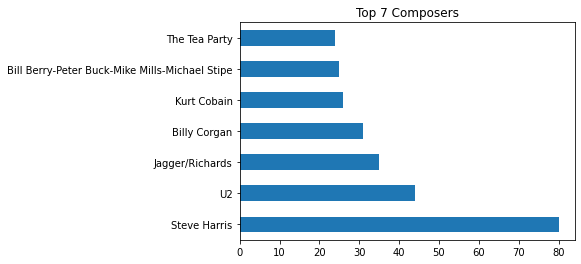

In [0]:
df11.composer.value_counts().head(7).plot(kind='barh')
plt.title('Top 7 Composers')
plt.show()

In [0]:
album.createOrReplaceTempView("album")
artist.createOrReplaceTempView("artist")
customer.createOrReplaceTempView("customer")
genre.createOrReplaceTempView("genre")
invoice.createOrReplaceTempView("invoice")
invoice_line.createOrReplaceTempView("invoice_line")
media_type.createOrReplaceTempView("media_type")
playlist.createOrReplaceTempView("playlist")
playlist_track.createOrReplaceTempView("playlist_track")
track.createOrReplaceTempView("track")

## Q1: Who is the senior most employee based on job title?#

In [0]:
employee.createOrReplaceTempView("employee")

In [0]:
%sql
select first_name, last_name , title from employee where reports_to is null;

first_name,last_name,title
Mohan,Madan,Senior General Manager


## Q2: Which Country have most invoices?

In [0]:
%sql
select billing_country, count(invoice_id) as invoice_count from invoice group by billing_country order by invoice_count desc limit 1;

billing_country,invoice_count
USA,131


## Q3: What are top 3 values of total invoice?

In [0]:
%sql
select total, invoice_id, customer_id from invoice order by total desc limit 3;

total,invoice_id,customer_id
23.759999999999998,183,42
19.8,362,29
19.8,31,3


## Q4: Which city has the best customers? We would like to throw a promotional Music Festival in the city we made the most money. Write a query that returns one city that has the highest sum of invoice totals. Return both the city name & sum of all invoice

In [0]:
%sql
select billing_city, sum(total) as invoice_total from invoice group by billing_city order by invoice_total desc limit 1;

billing_city,invoice_total
Prague,273.24000000000007


## Q5: Who is the best customer? The customer who has spent the most money will be declared the best customer. Write a query that returns the person who has spent the most money 

In [0]:
%sql
select c.customer_id, sum(i.total) from customer as c join invoice as i on c.customer_id = i.customer_id group by c.customer_id order by sum(total) desc limit 1;

customer_id,sum(total)
5,144.54000000000002


## Q6: Write query to return the email, first name, last name, & Genre of all Rock Music listeners. Return your list ordered alphabetically by email starting with A

In [0]:
%sql
select DISTINCT (c.email),c.first_name,c.last_name, i.invoice_id,g.genre_id,g.name from customer c join invoice i on 
c.customer_id = i.customer_id join invoice_line il on i.invoice_id = il.invoice_id join track t on il.track_id = t.track_id 
join genre g on t.genre_id = g.genre_id where g.name in (select name from genre where name like 'Rock' or name like 'rock') order by email;

email,first_name,last_name,invoice_id,genre_id,name
aaronmitchell@yahoo.ca,Aaron,Mitchell,559,1,Rock
aaronmitchell@yahoo.ca,Aaron,Mitchell,107,1,Rock
aaronmitchell@yahoo.ca,Aaron,Mitchell,126,1,Rock
aaronmitchell@yahoo.ca,Aaron,Mitchell,519,1,Rock
aaronmitchell@yahoo.ca,Aaron,Mitchell,432,1,Rock
aaronmitchell@yahoo.ca,Aaron,Mitchell,546,1,Rock
alero@uol.com.br,Alexandre,Rocha,186,1,Rock
alero@uol.com.br,Alexandre,Rocha,439,1,Rock
alero@uol.com.br,Alexandre,Rocha,475,1,Rock
alero@uol.com.br,Alexandre,Rocha,135,1,Rock


## Q7: Let's invite the artists who have written the most rock music in our dataset. Write a query that returns the Artist name and total track count of the top 10 rock bands

In [0]:
%sql
select ar.artist_id, ar.name, al.title, count(t.track_id) as track_count, t.genre_id, g.name 
from artist ar 
join album al on ar.artist_id = al.artist_id 
join track t on al.album_id = t.album_id 
join genre g on t.genre_id = g.genre_id 
where g.name='Rock' 
group by ar.artist_id, ar.name, al.title, t.genre_id, g.name 
order by track_count desc 
limit 10;

artist_id,name,title,track_count,genre_id,name
100,Lenny Kravitz,Greatest Hits,30,1,Rock
144,The Who,My Generation - The Very Best Of The Who,20,1,Rock
52,Kiss,Greatest Kiss,20,1,Rock
76,Creedence Clearwater Revival,"Chronicle, Vol. 1",20,1,Rock
76,Creedence Clearwater Revival,"Chronicle, Vol. 2",20,1,Rock
139,The Cult,"Pure Cult: The Best Of The Cult (For Rockers, Ravers, Lovers & Sinners) [uk]",18,1,Rock
51,Queen,Greatest Hits II,17,1,Rock
132,Soundgarden,A-Sides,17,1,Rock
150,U2,Rattle And Hum,17,1,Rock
51,Queen,Greatest Hits I,17,1,Rock


## Q8: Return all the track names that have a song length longer than the average song length. Return the Name and Milliseconds for each track. Order by the song length with the longest songs listed first

In [0]:
%sql
select name, milliseconds from track where
milliseconds > (select avg(milliseconds) as avg_track_length from track) order by milliseconds desc;

name,milliseconds
Funky Piano,934791
Going Down / Highway Star,913658
My Funny Valentine (Live),907520
Santana Jam,882834
The Sun Road,880640
Whole Lotta Love,863895
Mistreated (Alternate Version),854700
Just Ain't Good Enough,850259
Miles Runs The Voodoo Down,843964
Whole Lotta Love (Medley),825103


## Q9: Find how much amount spent by each customer on artists? Write a query to return customer name, artist name and total spent

In [0]:
%sql
select CONCAT_WS(' ',c.first_name,c.last_name),ar.name,SUM(il.unit_price*il.quantity) as Invoice
from customer c join invoice i on c.customer_id = i.customer_id join invoice_line il on i.invoice_id = il.invoice_id join track t on 
il.track_id = t.track_id join album al on t.album_id = al.album_id join artist ar on al.artist_id = ar.artist_id 
group by CONCAT_WS(' ',c.first_name,c.last_name), i.customer_id,ar.name order by SUM(il.unit_price*il.quantity) desc;

"concat_ws( , first_name, last_name)",name,Invoice
Hugh O'Reilly,Queen,27.719999999999985
Wyatt Girard,Frank Sinatra,23.75999999999999
Helena Holý,Red Hot Chili Peppers,19.799999999999997
Robert Brown,Creedence Clearwater Revival,19.799999999999997
Aaron Mitchell,James Brown,19.799999999999997
František Wichterlová,Kiss,19.799999999999997
François Tremblay,The Who,19.799999999999997
Hugh O'Reilly,Nirvana,18.81
Heather Leacock,House Of Pain,18.81
Niklas Schröder,Queen,18.81
